[  10   16   27   46   77  129  215  359  599 1000]
[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]
711 μs ± 147 μs per loop (mean ± std. dev. of 5 runs, 3 loops each)
73.4 μs ± 16.6 μs per loop (mean ± std. dev. of 5 runs, 3 loops each)
[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0

Text(0, 0.5, 'Mejor tiempo(s)')

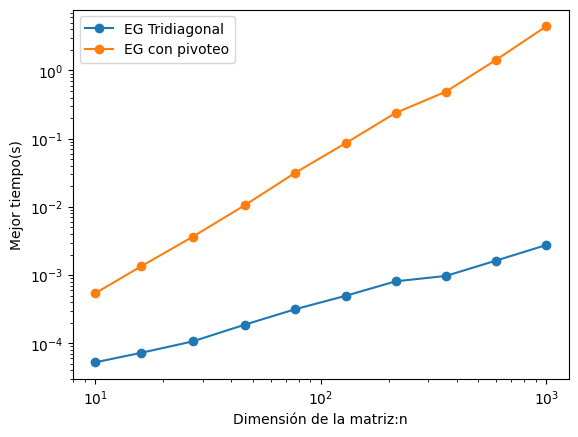

In [20]:
from eg_tridiag import *
from eg_con_pivot_juan import *

#Buscamos medir los tiempos de computo de los dos distintos algoritmos de EG en matrices laplacianas: con pivoteo y en caso de sistemas tridiagonales.
#       *Utilizamos la matriz laplaciana y un vector b asociado de 1s.
#       *Sabemos que por la caracterizacion de la matriz , es un SCD.

#Casos de EG con pivoteo
#Vamos a iterar por 6 tamaños de matrices ([10,10^5]);para cada tamaño construimos la matriz, resolvemos el sistema y computamos el tiempo


n=10

# x-> tiene las dimensiones que voy a explorar entre 10-10^4 espaciadas log.
x=np.logspace(1,3,10,dtype=int)

#Vectores con los tiempos para c/dimensión.
tiempos_eg=np.zeros(x.size)
tiempos_trid=np.zeros(x.size)

print(x)
for k in range(x.size):
    l_size=x[k]
    #Construimos los vectores a,b y c: las diagonales de la matriz.
    a=np.ones(l_size)
    c=np.copy(a)
    b=np.copy(a)
    b=b*(-2)

    #Armamos la matriz tridiagonal y el vector asociado: el cual es un vector aleatorio de 1s 
    m=np.zeros((l_size,l_size))
    for i in range(0,l_size):
        m[i,i]=-2
        if(i+1<l_size):
            m[i+1,i]=1
            m[i,i+1]=1
    print(m)            
    
    d=np.ones(l_size)

    #Tomamos 10 muestras en base  a 1000 corridas del la EG y computamos su tiempo.Lo mismo con tridiag.
    #Nos guardamos el tiempo para esa entrada.

    times=%timeit -r 5 -n 3 -o solve_con_pivot(m,d)
    tiempos_eg[k]=times.best

    times=%timeit -r 5 -n 3 -o solve_tridiag(a,b,c,d)
    tiempos_trid[k]=times.best


#print(tiempos_eg)
#print(tiempos_trid)



    









Text(0, 0.5, 'Mejor tiempo(s)')

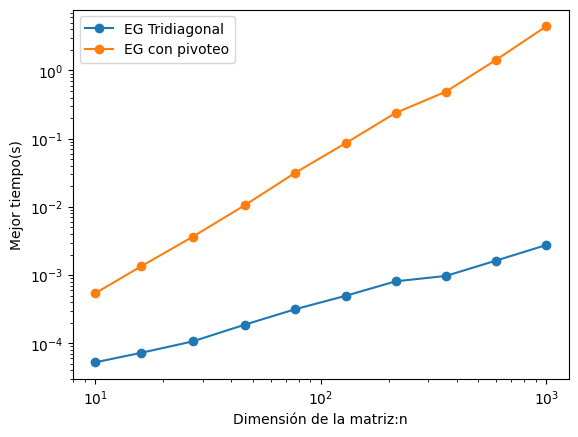

In [23]:
#Ploteamos los tiempos vs |A|

plt.plot(x,tiempos_trid,'-o',label='EG Tridiagonal')
plt.plot(x,tiempos_eg,'-o',label='EG con pivoteo')
plt.legend(loc='upper left')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Dimensión de la matriz:n')
plt.ylabel('Mejor tiempo(s)')



[8 3 1 6 7 4 9 9 1 7 7 7 8 3 7 6 4 8 8 5 1 6 4 3 7 5 6 5 8 3 9 1 8 5 6 9 1
 9 3 6 3 1 9 2 7 8 5 5 2 6]
279 μs ± 30.2 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)
119 μs ± 7.34 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)
[7 7 3 5 6 7 5 9 9 5 8 5 4 8 4 3 9 6 4 3 7 2 5 5 7 9 1 2 4 6 5 6 5 9 4 5 6
 6 7 5 3 9 8 7 1 5 8 5 7 6]
243 μs ± 9.09 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)
140 μs ± 21.2 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)
[9 9 4 9 9 1 3 5 2 8 5 5 7 6 4 9 5 9 2 6 4 6 2 8 9 4 9 2 2 9 4 5 6 8 4 3 6
 5 8 4 1 3 9 4 2 9 6 1 8 2]
The slowest run took 8.20 times longer than the fastest. This could mean that an intermediate result is being cached.
532 μs ± 498 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)
126 μs ± 12.5 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)
[5 2 1 3 2 7 9 1 3 5 1 1 7 8 3 5 3 7 1 7 4 8 2 4 4 6 5 8 1 6 8 2 1 4 6 2 9
 1 9 7 4 3 2 2 8 6 3 4 6 9]
273 μs ± 15.9 μs per loop (mean ± std. dev. o

Text(0, 0.5, 'Mejor tiempo (sec)')

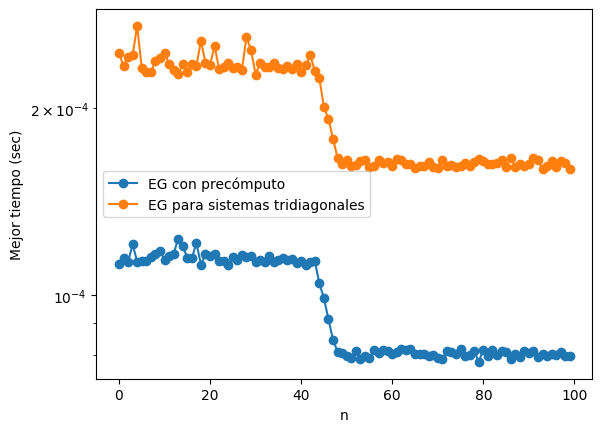

In [19]:
# Comparamos EG con pivoteo vs EG tridiagonal pero haciendo una unica vez el precomputo , para luego simplemente variar el vector b y devolver el X en base al precomputo.Notar que para EG debemos resolver el sistema de vuelta cada vez que cambiemos el b.

#Usamos un  matriz A de 50x50 como parametro y usaremos b de numeros aleatorios etren 1 y 10.
#Repetimos este proceso 100 veces , es decir , modificamos el b 100 veces y en cada sistema tomamos el mejor tiempo para ambos algoritmos.


l_size=50
n=100

tiempos_eg=np.zeros(n)
tiempos_trid=np.zeros(n)

#Construimos los vectores a,b y c: las diagonales de la matriz.
a=np.ones(l_size)
c=np.copy(a)
b=np.copy(a)
b=b*(-2)
a[0] = 0
c[-1] = 0
#Calculamos el precomputo del sistema.
p=precompute_tridiag(a,b,c)

for k in range(n):

    #Armamos la matriz tridiagonal y el vector asociado: el cual es un vector aleatorio de 1s 
    m=np.zeros((l_size,l_size))
    for i in range(0,l_size):
        m[i,i]=-2
        if(i+1<l_size):
            m[i+1,i]=1
            m[i,i+1]=1
    #print(m)            
    
    d=np.random.randint(1,10,l_size)
    print(d)

    #Tomamos 10 muestras en base  a 10 corridas del la EG y computamos su tiempo.Lo mismo con el precómputo.
    #Nos guardamos el tiempo para esa entrada.

    times=%timeit -r 10 -n 50 -o solve_tridiag(a,b,c,d)
    tiempos_eg[k]=times.best

    times=%timeit -r 10 -n 50 -o solve_tridiag_fast(p,d)
    tiempos_trid[k]=times.best

x=np.arange(n)

plt.plot(x,tiempos_trid,'-o',label='EG con precómputo')
plt.plot(x,tiempos_eg,'-o',label='EG para sistemas tridiagonales')
plt.legend(loc='center left')

#plt.xscale('log')
plt.yscale('log')

plt.xlabel('n')
plt.ylabel('Mejor tiempo (sec)')

